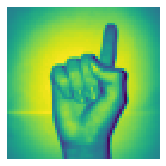

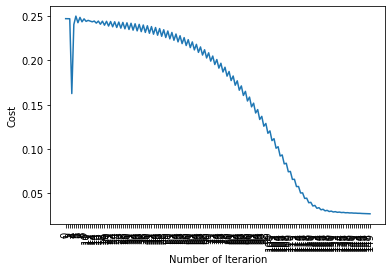

(1, 62)
test accuracy: 93.54838709677419 %


In [2]:
"""
Author: Göktuğ Yıldırım
Description: The perceptron distinguish photo is zero or one.
"""

import numpy as np #linear algebra
from sklearn.model_selection import train_test_split
import pandas as pd #data processing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Datalarda 2062 görsel var. 0'dan 9'a sayılar.
#204-408 zero 205 adet
#822-1027 one 206 adet

#load data set
x_l = np.load("X.npy")
y_ = np.load("Y.npy")

#look at data
img_size = 64
plt.subplot(111)
plt.imshow(x_l[250].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(121)
plt.imshow(x_l[850].reshape(img_size, img_size))
plt.axis("off")
plt.show()



#Data Processing
X = np.concatenate( (x_l[204:409], x_l[822:1027] ), axis=0 )
z = np.zeros(205) # yatay matrix
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1) #reshape() methoduyla her zaman yeni array üretilir.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train_X = X_train.shape[0]
number_of_test_X = X_test.shape[0]
number_of_train_Y = Y_train.shape[0]
number_of_test_Y = Y_test.shape[0]

x_train= X_train.reshape( number_of_train_X , X_train.shape[1]*X_train.shape[2] )
x_test= X_test .reshape( number_of_test_X , X_test.shape[1]*X_test.shape[2] )
y_train = Y_train
y_test = Y_test



def initialize_weights_and_bias(data_number, initialWeight, initialBias):
    w = np.full((data_number,1), initialWeight)
    b = initialBias
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_and_backward_propagation(w, b, x_train, y_train, numberOfTrainSamples):
    
    # Forward propagation başladı:
    z = np.dot(x_train,w) + b
    y_head = sigmoid(z)
    loss = (y_head-y_train)*(y_head-y_train)
    cost = np.sum(loss) / (2*numberOfTrainSamples)
    
    # Backward propagation başladı:
    derivative_weight = (np.dot(x_train.T,((y_head-y_train))))/numberOfTrainSamples
    derivative_bias = np.sum(y_head-y_train) / numberOfTrainSamples
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    
    return cost, gradients
    
    
def train(w, b, x_train, y_train, learningRate, numberOfIteration, numberOfTrainSamples):
  
    cost_list = []
    cost_list_x_axis = []
    
    for i in range(numberOfIteration):
        cost, gradients = forward_and_backward_propagation(w, b, x_train, y_train, numberOfTrainSamples)
       
        cost_list.append(cost)
        cost_list_x_axis.append(i)
    
        w = w - learningRate * gradients["derivative_weight"]
        b = b - learningRate * gradients["derivative_bias"]
        
        #print ("Cost after %i iteration : %f" %(i, cost))
    
    #Eğitilmiş weight ve bias
    parameters = {"weight": w,"bias": b}
    plt.plot(cost_list_x_axis ,cost_list)
    plt.xticks(cost_list_x_axis,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
        
    return parameters, gradients, cost_list

def predict(trainedWeight, trainedBias, x_test):
    
    # the last forward propagation
    z = np.dot(x_test, trainedWeight) + trainedBias
    y_head = sigmoid(z)
        
    Y_prediction = np.zeros((1,x_test.shape[0]))
    print(Y_prediction.shape)
    
    for i in range(y_head.shape[0]):
        if y_head[i,0]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction 
    
    

def myPerceptron(data_number, numberOfTrainSamples, x_train, x_test, y_train, y_test, learningRate, numberOfIteration, initial_Weight, initial_Bias):
   
    w, b = initialize_weights_and_bias(4096, initial_Weight, initial_Bias)
   
    parameters, gradients, cost_list = train(w, b, x_train, y_train, learningRate, numberOfIteration, numberOfTrainSamples)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"] ,x_test) #Eğitilmiş weight ve bias
    

    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test.T)) * 100)) 
    
    
myPerceptron(4096, 348, x_train, x_test, y_train, y_test, 0.01, 150, 0.01, 0)